In [11]:
import pandas as pd
import numpy as np
import math as mt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import random

 ### 1. Observations
Pontos cr´ıticos, convexidade, existˆencia de
´otimo, plotar, etc.
<br>
The problem is the following : 
\begin{equation} min \_ f(x) \end{equation}
\begin{equation} x ∈ Ω \end{equation}
\begin{equation} f(x1, x2, x3) = x_1^3 + x_2^3 + x_3^3 \end{equation}
\begin{equation} Ω = \{x ∈ R^3 : x_1^2 + x_2^2 + x_3^2 = 1\} \end{equation}
 
 <br> The restriction of Ω implies that x1, x2 and x3 belong to [-1, 1]



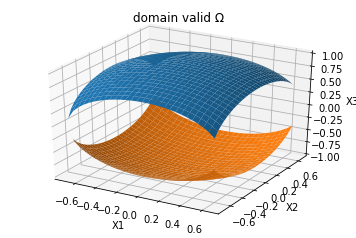

In [12]:
import numpy as np

def h(x1, x2):
    return mt.sqrt(1 - mt.pow(x1,2) - mt.pow(x2,2))

def h_neg(x1, x2):
    return -mt.sqrt(1 - mt.pow(x1,2) - mt.pow(x2,2))


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = y = np.arange(-0.7, 0.7, 0.05)
X, Y = np.meshgrid(x, y)
z1s = np.array([h(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z1 = z1s.reshape(X.shape)

ax.plot_surface(X, Y, Z1)

z2s = np.array([h_neg(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z2 = z2s.reshape(X.shape)

ax.plot_surface(X, Y, Z2)


ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('domain valid Ω')
plt.show()

#### a. Stationary points
To find the stationary points, we resolve the system grad(f) = 0. <br>
The only stationary point of f(x) is $x^*$ = (0, 0, 0), which is invalid (out of the domain Ω), as we can see on the plot above

#### b. Convexity
There are several ways to examine the convexity of a function. We will check the Hessian matrix. If it is semi-definite positive, then the function is convexe.
Here the Hessian is defined by <br>
   [2, 0, 0] <br>
   [0, 2, 0] <br>
   [0, 0, 2] <br>
 
The 3 eigen values are 2, 2 and 2, all positives. The Hessian of f(x) is definite positive for all the points x ∈ Ω. Hence, the function f(x) is convexe for all x ∈ Ω.

### 2.  Restricted problem

#### a. KKT
Before resolving a KKT system we need to make sure that a condition is verified.<br>
We will use the LICQ conditions which implies that union of the gradients of all the restrictions (equations and inequations) are linearly independant vectors.<br>
In our case, we only have one restriction equation : the only gradient is by definition linearly independant with himself. The LICQ conditions is verified.<br>
The KKT method gives the following system : <br>
-3$x_1^2$ = 2 * $\lambda_1$ * x1 <br>
-3$x_2^2$ = 2 * $\lambda_1$ * x2 <br>
-3$x_3^2$ = 2 * $\lambda_1$ * x3 <br>
 
which has one solution $x^*$ = (-2$\lambda_1$/3, -2$\lambda_1$/3, -2$\lambda_1$/3)

### 3. Irrestricted problem
In order to change our restricted problem into an irrestricted one. We have to use the method of intern or extern penality

#### a. Extern penality
We will use the penality function : <br>
P(x) = $\Sigma$ hi(x) + $\Sigma$[max(0, gi(x)] <br>
  
In our case, our objective function becomes : 
\begin{equation} f(x1, x2, x3) = x_1^3 + x_2^3 + x_3^3 + ro * {(x_1^2 + x_2^2 + x_3^2 - 1)} \end{equation}

With ro >0,

The extern penality has the advantages to be well defined in the valid and unvalid space. However, the value of ro need to tend to the infinity in order to approach the valid solution.


In [21]:
def f(x, ro):
    return mt.pow(x[0], 3) + mt.pow(x[1], 3) + mt.pow(x[2], 3) + 100 * (mt.pow(x[0], 2) + mt.pow(x[1], 2) + mt.pow(x[2], 2) - 1)

def grad_f(x, ro):
    return np.array([3*mt.pow(x[0],2) + 2*ro*x[0],
                     3*mt.pow(x[1],2) + 2*ro*x[1],
                     3*mt.pow(x[2],2) + 2*ro*x[2]])

def hessian_f(x, ro):
    return np.array([
        [6*x[0] + 2*ro, 0, 0],
        [0, 6*x[1] + 2*ro, 0],
        [0, 0, 6*x[1] + 2*ro]
    ])


#### b. Intern penality
In our case, the problem doesn't include restrictive inequations. Hence, we can't use the Intern penality method.

Now that we have a new objective function, we can look for its minimum using research algorithm.
In our case we will use the Gradient and Newton algorithm.
 
#### c. Gradient Descent

The Gradient Descent algorithm try to find a converging sequence of $x^k$ until it reaches a local minimum (grad_f = 0) of the function we tried to minimize. It uses the - gradient as a decreasing direction and the step will be found by the rules of Armijo. <br>
In order to avoid overflow, we use an iteration limitation k_max = 200.
 
The Armijo rule find a t (step) that verifies for $x_k$ ∈ Ω, n ∈ [0,1]  :
    \begin{equation} f(x_k + td) <= f(x_k) + n*t*grad_f(x_k)^T*d \end{equation}

In [14]:
max_k = 200
x_0 = [1, 2, 3]
epsilon = mt.pow(10, -1)
ro = 50


def armijo(x_k, d_k):
    # initialisation
    gamma = 0.8
    n = 1/4
    t = 0.3
    k = 0
    while ( ((f(x_k + t*d_k, ro)) > (f(x_k, ro) + n*t*np.dot(grad_f(x_k, ro), d_k))) & (k < max_k) ):
        t = t*gamma
        k += 1
    
    return t, k

def gradient_descent(x_0, ro):
    # intiatilisation
    x_k = x_0
    k = 0
    # convergence
    while ( (np.mean(grad_f(x_k, ro) - [0,0,0]) > epsilon) & (k < max_k) ):
        d_k = - grad_f(x_k, ro)
        t, k_armijo = armijo(x_k, d_k)
        x_k = x_k + t * d_k
        k += 1
    
    # return the local minimum
    return x_k, k

In [15]:
# proof of work
print("At k = 0, f(x_k) = " + str(f(x_0,ro)))
x_star, k_star = gradient_descent(x_0, ro)
print("At k = " + str(k_star) + ", f(x_k) = " + str(f(x_star, ro)))



At k = 0, f(x_k) = 1336.0
At k = 1, f(x_k) = 146.39649912604423


#### d. Quase Newton
In this method we try to use both quality of Newton (accuarcy) and gradient method (low computational cost).<br>
Hence, we use a different decision $d_k$. In the quase Newton method, the direction is calculated by multiplicating the Hessian with the gradient at a step k.

\begin{equation} d_k = - H_k * grad_f(k)  \end{equation}

In [41]:

def quase_newton(x_0, ro):
    x_k = x_0
    k = 0
    t = 0
    while ( (np.mean(grad_f(x_k, ro) - [0,0,0]) > epsilon) & (k < max_k) ):
        d_k = - np.dot(hessian_f(x_k, ro), grad_f(x_k, ro))
        t, k_armijo = armijo(x_k, d_k)
        x_k = x_k + t*d_k
        k += 1
        
    return x_k, k


In [42]:
# proof of work
print("At k = 0, f(x_k) = " + str(f(x_0,ro)))
x_star, k_star = quase_newton(x_0, ro)
print("At k = " + str(k_star) + ", f(x_k) = " + str(f(x_star, ro)))

At k = 0, f(x_k) = 1336.0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
At k = 200, f(x_k) = -1703298012551.0127
